In [6]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
url = 'https://raw.githubusercontent.com/PauloFS01/dataframes/main/reserve.csv'
reserve_df = pd.read_csv(url,parse_dates={'Date': ['Year', 'Month', 'Day']},index_col='Date')
y = reserve_df['Unemployment Rate'].dropna()
y.head()

/tmp/ipykernel_21565/2253502522.py:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  reserve_df = pd.read_csv(url,parse_dates={'Date': ['Year', 'Month', 'Day']},index_col='Date')


Date
1954-07-01    5.8
1954-08-01    6.0
1954-09-01    6.1
1954-10-01    5.7
1954-11-01    5.3
Name: Unemployment Rate, dtype: float64

In [3]:
def make_lags(ts, lags,name='y'):
    return pd.concat(
        {
            f'{name}_lag_{i+1}': ts.shift(i+1)
            for i in range(lags)
        },
        axis=1)

df_plot = pd.concat([y, make_lags(y,9)],axis=1).fillna(0)
df_plot.head()

,Unemployment Rate,y_lag_1,y_lag_2,y_lag_3,y_lag_4,y_lag_5,y_lag_6,y_lag_7,y_lag_8,y_lag_9
Date,,,,,,,,,,
1954-07-01,5.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1954-08-01,6.0,5.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1954-09-01,6.1,6.0,5.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1954-10-01,5.7,6.1,6.0,5.8,0.0,0.0,0.0,0.0,0.0,0.0
1954-11-01,5.3,5.7,6.1,6.0,5.8,0.0,0.0,0.0,0.0,0.0


Lag features can make cyrcle apparent

In [4]:
def lag_plot(df):
  lags = df.shape[1] - 1
  for i in range(1,lags):
    sns.regplot(x=f'y_lag_{i}',y='Unemployment Rate',data=df, line_kws={"color": "red"},label=f'y_lag_{i+1}')
    plt.show()

We can observe at lag plots the correlation is mostly linear

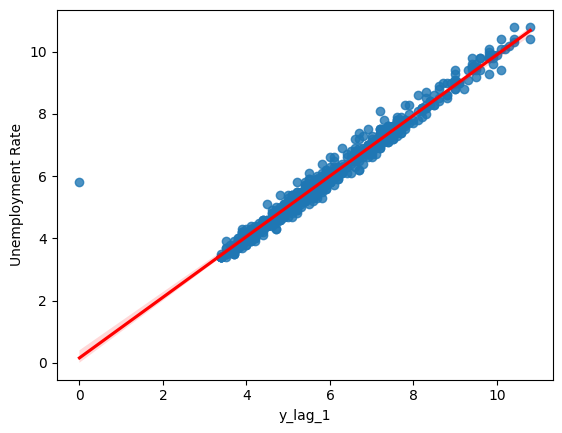

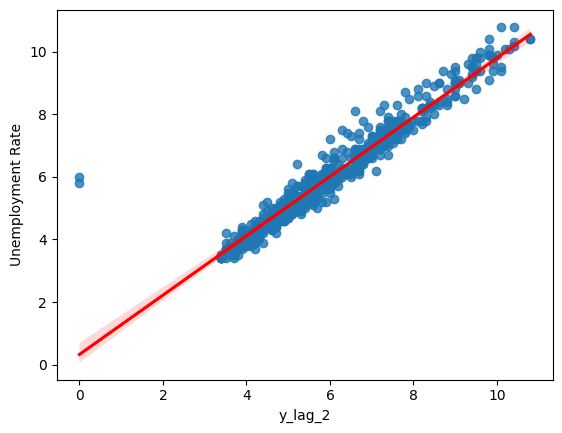

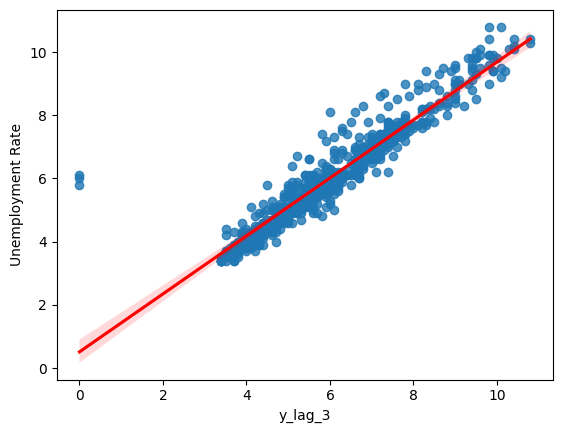

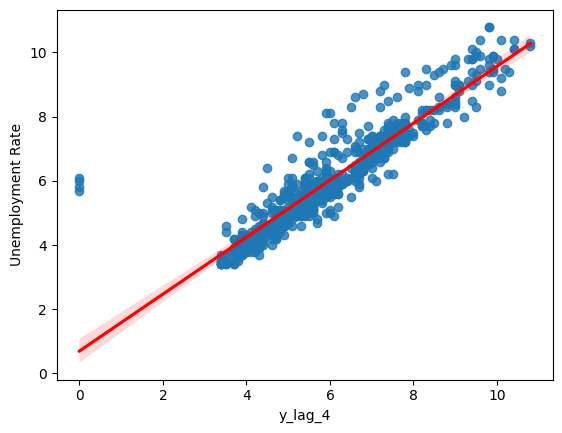

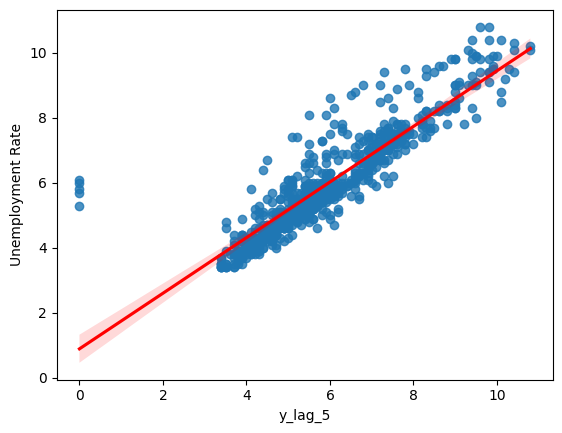

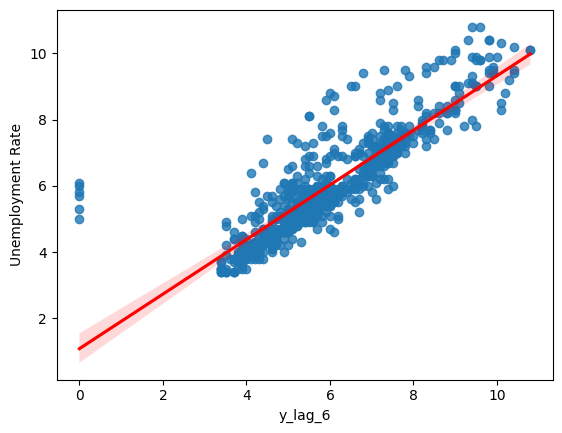

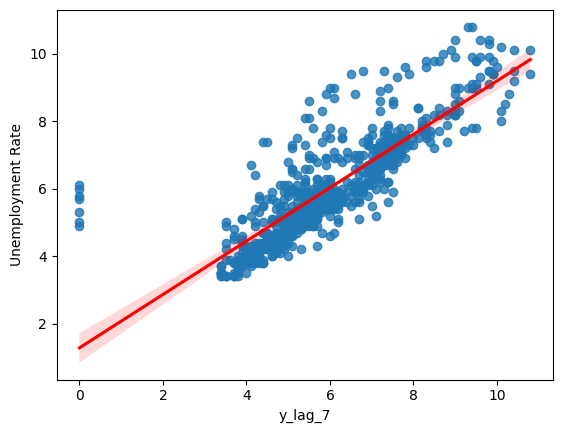

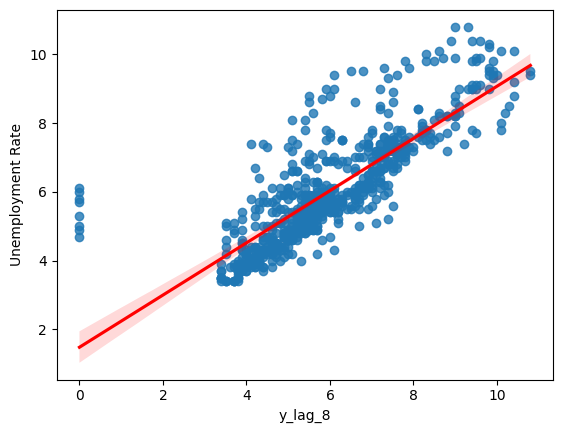

In [5]:
lag_plot(df_plot)

The autocorrelation show most correlated features

_ = plot_pacf(df_plot['Unemployment Rate'], lags=9)